In [ ]:
## Man trenger bare tre-fire Python-libraries:

import mysql.connector
from datetime import datetime
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
## Logging kan være praktisk - husk å importere logging etter de andre bibliotekene for å slippe støy med logging fra dem

import logging.config
logging.config.dictConfig({'version': 1,'disable_existing_loggers': True})

filelog = logging.FileHandler("standardlogg.log");  filelog.setLevel(level = logging.INFO)
conslog = logging.StreamHandler();                  conslog.setLevel(level = logging.DEBUG)
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s:%(levelname)s: %(message)s', handlers=[filelog, conslog])

In [ ]:
## Lager en kobling til serveren: 
kobling = mysql.connector.connect(  host ="localhost",
                                    user = "importuser",
                                    password = "importere",
                                    database = "tolltest1",
                                    port = "3306",)

logging.info(f"Sjekker om koblingen fungerer: {kobling.is_connected()=}")

In [ ]:
## Henter ut liste over alle kolonnene

tabell_navn = "lite_tabell"

cursor = kobling.cursor()
cursor.execute(f"SHOW columns FROM {tabell_navn}")
liste_over_alle_kolonner = [column[0] for column in cursor.fetchall()]

print(f"{liste_over_alle_kolonner = }")

In [ ]:



def lag_sporring():

    sporring = f"SELECT `{kolonne}`, count(`{kolonne}`) FROM `lite_tabell` GROUP BY `{kolonne}` ORDER BY `{kolonne}`"
    logging.debug(f"Generert spørring: {sporring}")
    
    return sporring

def hent_dataene(sporring):

    cursor = kobling.cursor()
    cursor.execute(sporring)
    dataene = cursor.fetchall()

    logging.debug(f"Antall rekker i kolonnen \'`{kolonne}`\': {len(dataene)}")

    return dataene

def lag_df(dataene):

    dataene_df = pd.DataFrame(dataene,columns = ["Kategori", "Antall"])
    logging.debug(f"Differanse mellom data og df for kolonnen \'`{kolonne}`\': {len(dataene)-len(dataene_df)=}")
    return dataene_df

def tegn_diagram(dataene_df):

    return plt.pie(dataene_df["Antall"], labels=dataene_df["Kategori"]);



def genererer_graf():

    '''
    sporring = lag_sporring()
    dataene = hent_dataene(sporring) 
    dataene_df = lag_df(dataene)

    tegn_diagram(dataene_df)
    '''
    

    tegn_diagram(lag_df(hent_dataene(lag_sporring())))
    


In [ ]:


#interessante_kolonner = ['kategori', 'behstat', 'innfgjel', 'hervang', 'landkode', 'transpm',]
interessante_kolonner = ['landkode', 'transpm',]
#interessante_kolonner = liste_over_alle_kolonner

logging.debug(f'Utfører spørringer mot følgende kolonner: {interessante_kolonner=}')

for kolonne in interessante_kolonner:
    genererer_graf()
    plt.show() # Viktig å be om show for at grafene skal vises separat i Jupyter


In [ ]:


def lag_sporring_statistikk():

    sporring = f"SELECT MIN(`{kolonne}`), MAX(`{kolonne}`), AVG(`{kolonne}`), SUM(`{kolonne}`) FROM `{tabell}`"
    logging.debug(f"Generert spørring: {sporring}")
    return sporring

def hent_dataene_statistikk(sporring):

    cursor = kobling.cursor()
    cursor.execute(sporring)
    dataene = cursor.fetchall()

    logging.debug(f"Antall rekker i spørringsoutput \'`{kolonne}`\': {len(dataene)}")

    return dataene

def lag_df_statistikk(dataene):

    dataene_df = pd.DataFrame(dataene, columns = ["MIN", "MAX", "AVG", "SUM"])
    logging.debug(f"Differanse mellom data og df for kolonnen \'`{kolonne}`\': {len(dataene)-len(dataene_df)=}")
    return dataene_df

def tegn_tabell_statistikk(dataene_df):

    print(kolonne)
    print(dataene_df)
    return dataene_df


def genererer_tabell_statistikk():

    sporring = lag_sporring_statistikk()
    dataene = hent_dataene_statistikk(sporring) 
    dataene_df = lag_df_statistikk(dataene)

    tegn_tabell_statistikk(dataene_df)


tallkolonner = ['ekspdato', 'brutvekt', 'mengde','(år + nr)']

logging.debug(f'Utfører spørringer mot følgende kolonner: {tallkolonner=}')

for tabell in ['lite_tabell']:
    for kolonne in tallkolonner:
        genererer_tabell_statistikk()
        
        

In [ ]:


def lag_sporring_tabellengde():

    sporring = f"SELECT COUNT(1) FROM `{tabell}`"
    logging.debug(f"Generert spørring: {sporring}")
    return sporring

def hent_dataene_tabellengde(sporring):

    cursor = kobling.cursor()
    cursor.execute(sporring)
    dataene = cursor.fetchall()

    logging.debug(f"Antall rekker i spørringsoutput \'`{kolonne}`\': {len(dataene)}")

    return dataene

def lag_df_tabellengde(dataene):

    dataene_df = pd.DataFrame(dataene)
    logging.debug(f"Differanse mellom data og df for kolonnen \'`{kolonne}`\': {len(dataene)-len(dataene_df)=}")
    return dataene_df

def tegn_tabell_tabellengde(dataene_df):
    
    print(dataene_df)
    return dataene_df

def genererer_tabell_tabellengde():

    sporring = lag_sporring_tabellengde()
    dataene = hent_dataene_tabellengde(sporring) 
    dataene_df = lag_df_tabellengde(dataene)

    tegn_tabell_tabellengde(dataene_df)



for tabell in ['lite_tabell']:
    print(f"Lengde på tabellen: {tabell=}")
    genererer_tabell_tabellengde()
        
        

In [ ]:


def lag_sporring_kolonne_unik_telling():


    sporring = f"SELECT COUNT(DISTINCT `{kolonne}`) FROM `{tabell}`"
    logging.debug(f"Generert spørring: {sporring}")
    return sporring

def hent_dataene_kolonne_unik_telling(sporring):

    cursor = kobling.cursor()
    cursor.execute(sporring)
    dataene = cursor.fetchall()

    logging.debug(f"Antall rekker i spørringsoutput \'`{kolonne}`\': {len(dataene)}")

    return dataene

def lag_df_kolonne_unik_telling(dataene):

    dataene_df = pd.DataFrame(dataene)
    logging.debug(f"Differanse mellom data og df for kolonnen \'`{kolonne}`\': {len(dataene)-len(dataene_df)=}")
    return dataene_df

def tegn_tabell_kolonne_unik_telling(dataene_df):

    print(dataene_df)
    return dataene_df

def genererer_tabell_kolonne_unik_telling():

    sporring = lag_sporring_kolonne_unik_telling()
    dataene = hent_dataene_kolonne_unik_telling(sporring) 
    dataene_df = lag_df_kolonne_unik_telling(dataene)

    tegn_tabell_kolonne_unik_telling(dataene_df)



logging.debug(f'Utfører spørringer mot følgende kolonner: {liste_over_alle_kolonner=}')

for tabell in ['lite_tabell']:
    for kolonne in liste_over_alle_kolonner[3:]:
        print(f"Antall unike i kolonnen {kolonne=}")
        genererer_tabell_kolonne_unik_telling()
        
        
        

2022-08-15 11:14:19,136:DEBUG: Generert spørring: SELECT landkode, count(landkode) FROM `lite_tabell` GROUP BY landkode ORDER BY landkode
2022-08-15 11:14:19,148:DEBUG: Antall rekker i kolonnen 'landkode': 52
2022-08-15 11:14:19,150:DEBUG: Differanse mellom data og df for kolonnen 'landkode': len(dataene)-len(dataene_df)=0


{'database': '', 'tabell': '', 'kolonneliste': '', 'kolonnelengder': '', 'typeforslag': '', 'type': '', 'minmax': '', 'avgsum': '', 'bar': '', 'kake': ''}
{'database': 'TVINN', 'tabell': 'lite_tabell', 'kolonneliste': True, 'kolonnelengder': True, 'typeforslag': False, 'type': 'kode', 'minmax': True, 'avgsum': True, 'bar': True, 'kake': False, 'kolonne': 'landkode'}


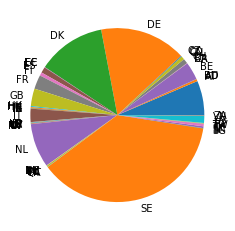

In [40]:

graf_gen_dict = {
    "database":"",
    "tabell":"",
    "kolonneliste":"",
    "kolonnelengder":"",
    "typeforslag":"",
    "type":"",
    "minmax":"",
    "avgsum":"",
    "bar":"",
    "kake":"",
}

print(graf_gen_dict)

graf_gen_dict["database"] = "TVINN"
graf_gen_dict["tabell"] = "lite_tabell"
graf_gen_dict["kolonne"] = "landkode"
graf_gen_dict["kolonneliste"] = True
graf_gen_dict["kolonnelengder"] = True
graf_gen_dict["typeforslag"] = False
graf_gen_dict["type"] = "kode"
graf_gen_dict["minmax"] = True
graf_gen_dict["avgsum"] = True
graf_gen_dict["bar"] = True
graf_gen_dict["kake"] = False

print(graf_gen_dict)



if graf_gen_dict["type"] == "kode":
    
    if graf_gen_dict["bar"] == True:
        for kolonne in [graf_gen_dict["kolonne"]]:
            genererer_graf()




